Detection of edges,lines and corners


In [1]:
import numpy as np
import pandas as pd
import cv2 as cv2
from skimage import io
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from PIL import Image
#chttps://scikit-image.org/docs/dev/api/skimage.data.html

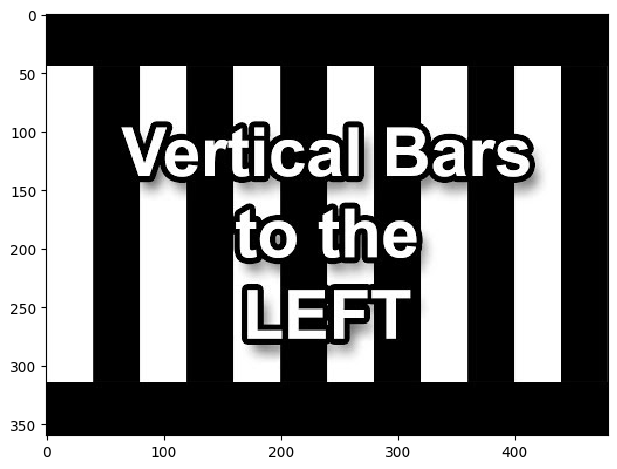

In [3]:
img =io.imread('https://i.ytimg.com/vi/g7MjBQhV-tg/hqdefault.jpg')
io.imshow(img)

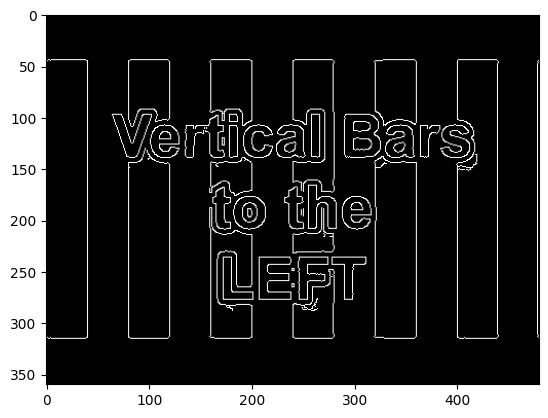

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edge = cv2.Canny(gray,50,150)
plt.imshow(edge,'gray')

In [5]:
lines = cv2.HoughLines(edge,1,np.pi/180,110)


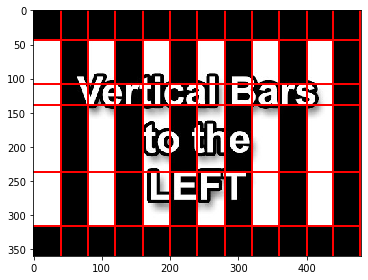

In [ ]:
for line in lines:
  rho,theta=line[0]
  a=np.cos(theta)
  b=np.sin(theta)
  #Conversion to cartesian coorsinates from polar
  x0=a*rho #rcos(theta)
  y0=b*rho #rsin(theta)
  x1=int(x0+1000*(-b))#x1=rcos(theta)-1000sin(theta)
  y1=int(y0+1000*(a))#y1=rsin(theta)+1000cos(theta)
  x2=int(x0-1000*(-b))#x2=rcos(theta)+1000sin(theta)
  y2=int(y0-1000*(a))#y2=rsin(theta)-1000cos(theta)
  cv2.line(img,(x1,y1),(x2,y2),(255,0,0),2)# 2 is width of line

io.imshow(img)

Text(0.5, 1.0, 'Sobel x and y filter combined')

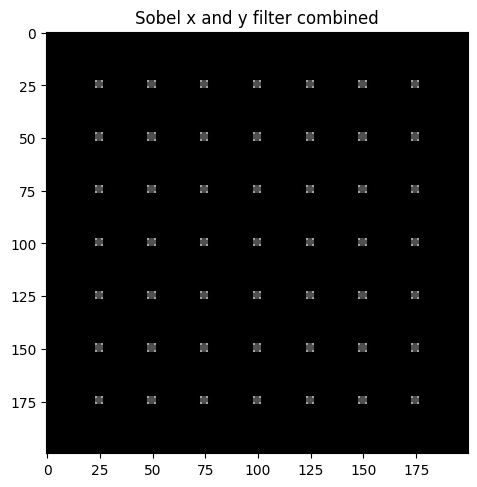

In [6]:
from skimage import data
img1=data.checkerboard()
sobelx=cv2.Sobel(img1, cv2.CV_64F,1,0)# 1 0 for derivative in x direction
# cv_64f is data type 64 bit float which can deal with negatives
sobely=cv2.Sobel(img1, cv2.CV_64F,0,1)# 0 1 for derivative in y direction
#To convert it back to unsigned int
sobelx=np.uint8(np.absolute(sobelx))
sobely=np.uint8(np.absolute(sobely))
sobelcombined=cv2.bitwise_and(sobelx,sobely)
io.imshow(sobelcombined)
plt.title('Sobel x and y filter combined')

Text(0.5, 1.0, 'Sobel x and y filter combined')

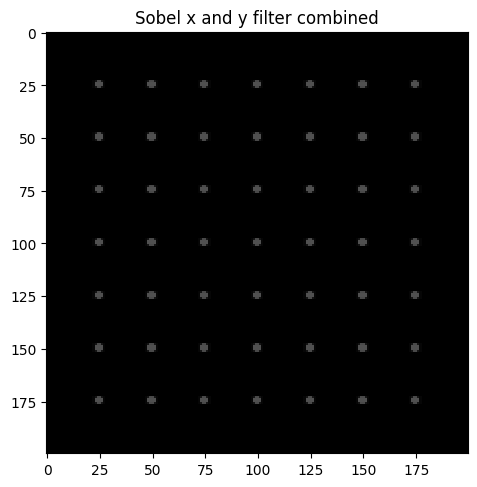

In [7]:
from skimage import data
img1=data.checkerboard()
sobelcombined=cv2.Sobel(img1, cv2.CV_64F,1,1)
sobelcombined=np.uint8(np.absolute(sobelcombined))
io.imshow(sobelcombined)
plt.title('Sobel x and y filter combined')

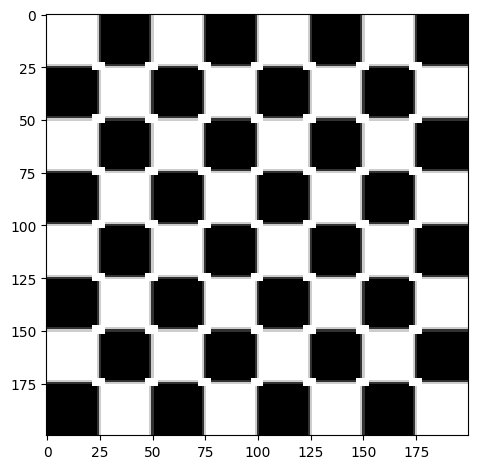

In [8]:
img1[sobelcombined>0]=255
io.imshow(img1)

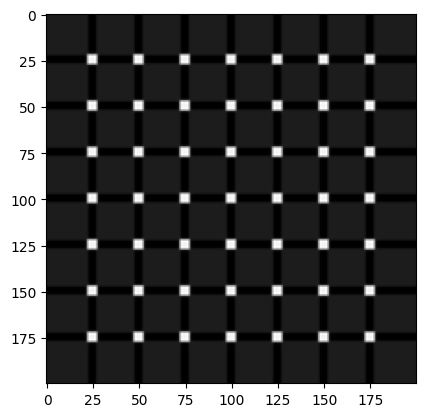

In [9]:
from skimage import data
img1= data.checkerboard()
i =cv2.cornerHarris(img1,5,3,0.04)
plt.imshow(i,'gray')